In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler  # Import StandardScaler from scikit-learn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score


In [2]:
# Load data
all_data = pd.read_excel('alldata.xlsx')
dr_data = pd.read_excel('drdata.xlsx')
dr_question = pd.read_excel('drq.xlsx')
elect_data = pd.read_excel('electeddata.xlsx')
tv2_data = pd.read_excel('tv2data.xlsx')
tv2_question = pd.read_excel('tv2q.xlsx')

## show data

In [3]:
all_data

,530,531,533,534,535,537,538,540,541,543,...,9a,9b,10a,10b,11a,11b,12a,12b,storkreds,alder
0,-1,-2,1,-2,2,1,-2,1,1,2,...,2,0,1,-2,-2,1,1,1,Københavns Storkreds,78
1,2,2,-1,-2,-1,-2,1,-2,2,-2,...,-2,0,-1,2,1,-2,0,0,Fyns Storkreds,64
2,2,1,-2,-2,1,-2,1,-1,1,-1,...,-1,-2,0,2,0,-1,1,-2,Bornholms Storkreds,37
3,2,1,-2,-1,1,1,1,1,1,-2,...,-2,2,2,2,2,-1,2,0,Nordjyllands Storkreds,28
4,1,1,-2,2,-2,1,-2,1,2,-2,...,-2,0,-1,0,-2,0,2,-2,Københavns Storkreds,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862,1,1,1,-2,2,-1,1,-2,1,1,...,1,2,-1,2,1,-2,0,0,Københavns Omegns Storkreds,33
863,1,-2,-2,-2,1,-2,-1,-2,-2,-2,...,-1,0,-1,2,2,-2,0,0,Københavns Omegns Storkreds,45
864,1,1,1,-2,2,-1,1,-1,-1,1,...,-1,0,-1,2,2,-2,0,1,Københavns Omegns Storkreds,52
865,1,-1,1,-2,1,-1,-1,-1,-1,1,...,0,0,0,2,1,-2,1,0,Københavns Omegns Storkreds,44


In [4]:
dr_data

,530,531,533,534,535,537,538,540,541,543,...,552,553,555,556,557,559,561,563,navn,parti
0,-1,-2,1,-2,2,1,-2,1,1,2,...,2,-2,2,2,1,2,2,-2,Lars Philipsen Prahm,Moderaterne
1,2,2,-1,-2,-1,-2,1,-2,2,-2,...,1,1,-1,-2,1,2,1,2,Karsten Hønge,Socialistisk Folkeparti
2,2,1,-2,-2,1,-2,1,-1,1,-1,...,2,-1,-2,-1,1,2,2,2,Martin Kelleher-Petersen,Alternativet
3,2,1,-2,-1,1,1,1,1,1,-2,...,2,1,2,-2,2,2,2,2,Nicklas Gjedsig Larsen,Alternativet
4,1,1,-2,2,-2,1,-2,1,2,-2,...,2,-2,-2,-1,1,-2,-1,-2,Tom Gillesberg,Løsgænger
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899,1,1,1,-2,2,-1,1,-2,1,1,...,-1,1,1,-2,2,0,2,1,Maria Gudme,Socialdemokratiet
900,1,-2,-2,-2,1,-2,-1,-2,-2,-2,...,2,1,-1,-2,2,2,-1,1,Maria Durhuus,Socialdemokratiet
901,1,1,1,-2,2,-1,1,-1,-1,1,...,1,2,2,-2,1,1,1,1,Morten Bødskov,Socialdemokratiet
902,1,-1,1,-2,1,-1,-1,-1,-1,1,...,1,-1,1,-2,1,1,1,1,Jeppe Bruus,Socialdemokratiet


In [5]:
dr_question

,ID,Title,Question,Info,ArgumentFor,ArgumentAgainst,WordMerger,ID_CandidateQuestionType,Rule,QuestionListData
0,530,KLIMA OG ENERGI,Danmark skal bruge flere penge på at styrke to...,NaN,Den kollektive trafik bør være billig og tilgæ...,Det er dyrt for statskassen at opretholde drif...,0,1,FT,NaN
1,531,ARBEJDSMARKED OG ØKONOMI,Der skal indføres en særlig skat på de allerhø...,NaN,Historisk rammer kriser de fattigste hårdest. ...,Det danske samfund er et af de mest lige samfu...,0,1,FT,NaN
2,533,RET OG STRAF,Kriminalitet begået i udsatte boligområder ska...,NaN,Den mest effektive måde at stoppe bandekrimina...,"Det er urimeligt, at den samme forbrydelse ska...",0,1,FT,NaN
3,534,EU OG UDENRIGS,På sigt skal Danmark meldes ud af EU,NaN,"Så længe Danmark er medlem af EU, kan flertall...",Danmark er bedst tjent med at være en del af E...,0,1,FT,NaN
4,535,EU OG UDENRIGS,"Det er fornuftigt, at Danmark i de kommende år...",NaN,Ruslands angreb på Ukraine har ændret alting o...,Vi er medlemmer af Nato og har i forvejen et s...,0,1,FT,NaN
5,537,VELFÆRD,"Det er okay, at den økonomiske ulighed stiger,...",NaN,Økonomisk ulighed afspejler belønningen den en...,Større økonomisk ulighed vil skævvride samfund...,0,1,FT,NaN
6,538,UDDANNELSE,Forældres indkomst skal være et af kriterierne...,NaN,Det er vigtigt at vores gymnasier består af un...,De unge risikerer at miste pladsen på deres næ...,0,1,FT,NaN
7,540,VELFÆRD,Det skal være muligt at tjene penge på at driv...,NaN,Der er brug for en bred vifte af forskellige d...,Skattekroner tiltænkt velfærd skal ikke kunne ...,0,1,FT,NaN
8,541,ARBEJDSMARKED OG ØKONOMI,Der skal indføres skat på fortjenesten ved sal...,NaN,"Det er kun rimeligt, at man betaler skat af st...","Det er mere sikkert for alle, at boligejere be...",0,1,FT,NaN
9,543,VELFÆRD,"Det er en god idé, at dagpengesatsen for nyudd...",NaN,De fleste nyuddannede er yngre mennesker uden ...,Som nyuddannet er man ofte ved at etablere sig...,0,1,FT,NaN


In [6]:
elect_data

,530,531,533,534,535,537,538,540,541,543,...,9a,9b,10a,10b,11a,11b,12a,12b,storkreds,alder
0,2,2,-1,-2,-1,-2,1,-2,2,-2,...,-2,0,-1,2,1,-2,0,0,Fyns Storkreds,64
1,2,2,-2,-2,-2,-2,2,2,2,-2,...,-2,0,-2,2,1,1,0,-2,Østjyllands Storkreds,58
2,2,2,-2,-1,-1,-1,1,-2,2,-2,...,-2,0,-1,2,0,-2,-1,1,Østjyllands Storkreds,30
3,-1,-1,2,-1,2,-1,-2,1,-2,1,...,-1,-1,0,2,-2,2,0,0,Østjyllands Storkreds,53
4,-1,-1,1,-2,2,1,-2,1,-2,1,...,-1,0,1,1,-2,2,1,-1,Østjyllands Storkreds,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,1,1,2,-2,2,-1,1,-1,-1,1,...,0,-1,1,2,1,-2,1,0,Københavns Omegns Storkreds,41
165,1,1,1,-2,2,-1,1,-1,-1,1,...,-1,0,-1,2,1,-2,1,1,Københavns Omegns Storkreds,33
166,1,-2,-2,-2,1,-2,-1,-2,-2,-2,...,-1,0,-1,2,2,-2,0,0,Københavns Omegns Storkreds,45
167,1,1,1,-2,2,-1,1,-1,-1,1,...,-1,0,-1,2,2,-2,0,1,Københavns Omegns Storkreds,52


In [7]:
tv2_data

,1a,1b,2a,2b,3a,3b,4a,4b,5a,5b,...,10a,10b,11a,11b,12a,12b,parti,navn,storkreds,alder
0,0,1,1,1,1,-1,0,1,0,0,...,0,2,-1,2,0,0,Venstre,Birthe Tindbæk Bredo,Bornholms Storkreds,63
1,-1,1,0,-1,2,-2,-1,-1,-2,1,...,1,-1,-1,2,1,-1,Venstre,Julie Pauch Nymark,Bornholms Storkreds,27
2,-2,0,0,1,1,-1,0,1,-1,1,...,1,1,-2,2,1,1,Venstre,Peter Juel-Jensen,Bornholms Storkreds,56
3,-2,-1,2,2,2,-2,0,-1,-2,1,...,1,-1,-2,2,2,-2,Dansk Folkeparti,Mette Sode Hansen,Bornholms Storkreds,42
4,-2,-1,1,1,2,-2,1,0,-1,1,...,2,1,-1,2,0,1,Dansk Folkeparti,René Danielsson,Bornholms Storkreds,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957,2,2,2,2,-2,2,2,-2,-2,1,...,-1,2,-2,2,0,0,"Frie Grønne, Danmarks Nye Venstrefløjsparti",Karina Dammand,Østjyllands Storkreds,42
958,2,2,2,2,-2,2,2,2,-2,-1,...,-2,2,-2,2,-2,-2,"Frie Grønne, Danmarks Nye Venstrefløjsparti",Mohamed Abdikarim,Østjyllands Storkreds,33
959,2,2,2,2,-2,2,2,1,-2,0,...,1,2,-1,2,1,1,"Frie Grønne, Danmarks Nye Venstrefløjsparti",Niko Grünfeld,Østjyllands Storkreds,47
960,1,2,2,1,-2,1,2,0,-1,0,...,2,1,-2,2,1,0,"Frie Grønne, Danmarks Nye Venstrefløjsparti",Sara Hvidbak Grouleff,Østjyllands Storkreds,33


In [8]:
tv2_question

,id,type,header,question,depends
0,bornholm-1,rate,Bornholms Storkreds,Med særligt attraktive vilkår bør staten sikre...,{'selectedArea': 'bornholms storkreds'}
1,bornholm-2,rate,Bornholms Storkreds,"Staten bør sørge for, at flytrafikken til og f...",{'selectedArea': 'bornholms storkreds'}
2,bornholm-3,rate,Bornholms Storkreds,Der skal sættes flere penge af til Forsvarets ...,{'selectedArea': 'bornholms storkreds'}
3,bornholm-4,rate,Bornholms Storkreds,Det skal være lettere at hente udenlandsk arbe...,{'selectedArea': 'bornholms storkreds'}
4,bornholm-5,rate,Bornholms Storkreds,Beslutningen om at etablere en naturnationalpa...,{'selectedArea': 'bornholms storkreds'}
...,...,...,...,...,...
69,10b,rate,Socialområdet,"Den såkaldte Arne-pension, der giver mulighed ...",NaN
70,11a,rate,Mink-sagen,Der har været alt for meget fokus på Mette Fre...,NaN
71,11b,rate,Mink-sagen,"Det bør undersøges, om Mette Frederiksen kan s...",NaN
72,12a,rate,Coronavirus,"Hvis coronasmitten stiger markant til vinter, ...",NaN


## Process data

- PCA

In [9]:
# PCA
# dr
dr_data_p = dr_data.copy()
dr_data_p.drop(columns=["navn"], inplace=True)

party_mapping = pd.DataFrame(
    {
        "Party letter": [
            "A",
            "V",
            "M",
            "F",
            "Æ",
            "I",
            "C",
            "Ø",
            "B",
            "D",
            "Å",
            "O",
            "Q",
            "K",
        ],
        "Party name": [
            "Socialdemokratiet",
            "Venstre",
            "Moderaterne",
            "Socialistisk Folkeparti",
            "Danmarksdemokraterne",
            "Liberal Alliance",
            "Konservative",
            "Enhedslisten",
            "Radikale Venstre",
            "Nye Borgerlige",
            "Alternativet",
            "Dansk Folkeparti",
            "Frie Grønne",
            "Kristendemokraterne",
        ],
    }
)
# Define a mapping from party letters to numerical values
party_number_mapping = {
    "A": 1,
    "V": 2,
    "M": 3,
    "F": 4,
    "Æ": 5,
    "I": 6,
    "C": 7,
    "Ø": 8,
    "B": 9,
    "D": 10,
    "Å": 11,
    "O": 12,
    "Q": 13,
    "K": 14,
}

color_dict = {
    "A": "#b32722",
    "V": "#006697",
    "M": "#6c39e5",
    "F": "#dd0878",
    "Æ": "#8ac3ff",
    "I": "#21c6cf",
    "C": "#9eba27",
    "Ø": "#ed8019",
    "B": "#713280",
    "D": "#054f5c",
    "Å": "#2a8f39",
    "O": "#f3cd41",
    "Q": "#00e66a",
    "K": "#bababa",
}

# Create a new dictionary mapping party numbers to colors
number_color_dict = {party_number_mapping[k]: v for k, v in color_dict.items()}

# Map party letters to numerical values
dr_data_p["parti"] = dr_data_p["parti"].map(
    party_mapping.set_index("Party name")["Party letter"]
)
dr_data_p["parti"] = dr_data_p["parti"].map(party_number_mapping)

# Drop rows with NaN values in the 'party' column
dr_data_p.dropna(subset=["parti"], inplace=True)

In [10]:
dr_data_p

,530,531,533,534,535,537,538,540,541,543,...,551,552,553,555,556,557,559,561,563,parti
0,-1,-2,1,-2,2,1,-2,1,1,2,...,1,2,-2,2,2,1,2,2,-2,3.0
1,2,2,-1,-2,-1,-2,1,-2,2,-2,...,-2,1,1,-1,-2,1,2,1,2,4.0
2,2,1,-2,-2,1,-2,1,-1,1,-1,...,-2,2,-1,-2,-1,1,2,2,2,11.0
3,2,1,-2,-1,1,1,1,1,1,-2,...,-2,2,1,2,-2,2,2,2,2,11.0
5,2,1,-2,-2,-1,-1,-1,1,1,-1,...,-2,-1,-1,-2,-1,1,2,2,2,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899,1,1,1,-2,2,-1,1,-2,1,1,...,1,-1,1,1,-2,2,0,2,1,1.0
900,1,-2,-2,-2,1,-2,-1,-2,-2,-2,...,-1,2,1,-1,-2,2,2,-1,1,1.0
901,1,1,1,-2,2,-1,1,-1,-1,1,...,1,1,2,2,-2,1,1,1,1,1.0
902,1,-1,1,-2,1,-1,-1,-1,-1,1,...,1,1,-1,1,-2,1,1,1,1,1.0


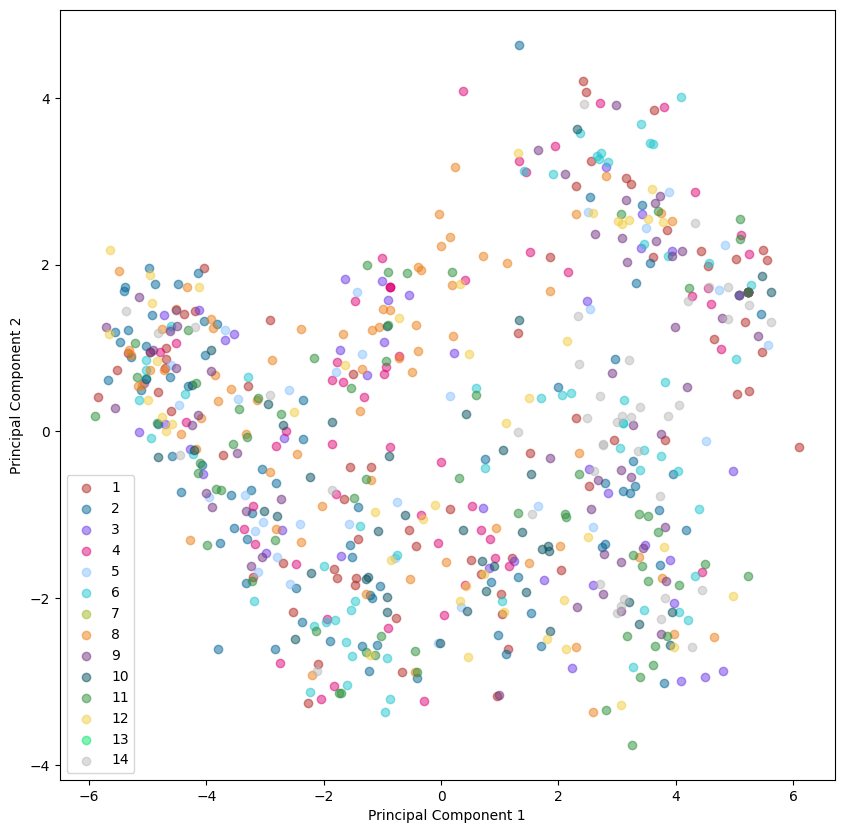

In [11]:
scaler = StandardScaler()
data_for_pca_standardized = scaler.fit_transform(dr_data_p)

# Create a PCA model with 2 components (for 2D visualization)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_for_pca_standardized)

pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# Create a new column in pca_df for party colors
pca_df['color'] = dr_data_p['parti'].map(number_color_dict)

plt.figure(figsize=(10, 10))
for party_number, color in number_color_dict.items():
    ix = pca_df['color'] == color
    plt.scatter(pca_df.loc[ix, 'PC1'], pca_df.loc[ix, 'PC2'], c=color, label=party_number, alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


In [12]:
tv2_data

,1a,1b,2a,2b,3a,3b,4a,4b,5a,5b,...,10a,10b,11a,11b,12a,12b,parti,navn,storkreds,alder
0,0,1,1,1,1,-1,0,1,0,0,...,0,2,-1,2,0,0,Venstre,Birthe Tindbæk Bredo,Bornholms Storkreds,63
1,-1,1,0,-1,2,-2,-1,-1,-2,1,...,1,-1,-1,2,1,-1,Venstre,Julie Pauch Nymark,Bornholms Storkreds,27
2,-2,0,0,1,1,-1,0,1,-1,1,...,1,1,-2,2,1,1,Venstre,Peter Juel-Jensen,Bornholms Storkreds,56
3,-2,-1,2,2,2,-2,0,-1,-2,1,...,1,-1,-2,2,2,-2,Dansk Folkeparti,Mette Sode Hansen,Bornholms Storkreds,42
4,-2,-1,1,1,2,-2,1,0,-1,1,...,2,1,-1,2,0,1,Dansk Folkeparti,René Danielsson,Bornholms Storkreds,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957,2,2,2,2,-2,2,2,-2,-2,1,...,-1,2,-2,2,0,0,"Frie Grønne, Danmarks Nye Venstrefløjsparti",Karina Dammand,Østjyllands Storkreds,42
958,2,2,2,2,-2,2,2,2,-2,-1,...,-2,2,-2,2,-2,-2,"Frie Grønne, Danmarks Nye Venstrefløjsparti",Mohamed Abdikarim,Østjyllands Storkreds,33
959,2,2,2,2,-2,2,2,1,-2,0,...,1,2,-1,2,1,1,"Frie Grønne, Danmarks Nye Venstrefløjsparti",Niko Grünfeld,Østjyllands Storkreds,47
960,1,2,2,1,-2,1,2,0,-1,0,...,2,1,-2,2,1,0,"Frie Grønne, Danmarks Nye Venstrefløjsparti",Sara Hvidbak Grouleff,Østjyllands Storkreds,33


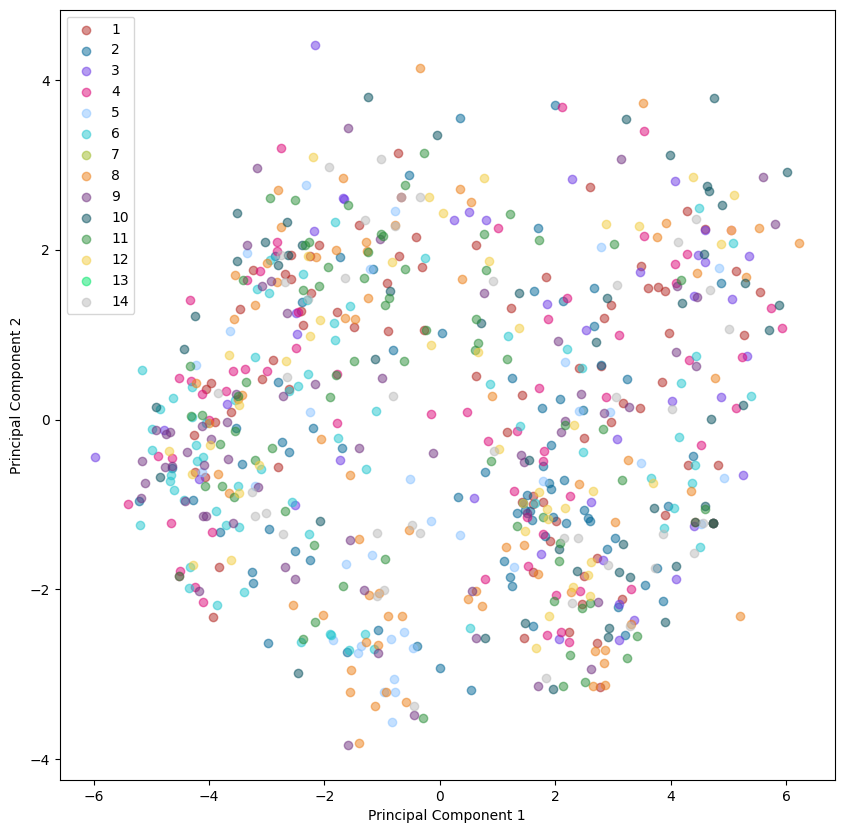

In [13]:
# tv2
tv2_data_p = tv2_data.copy()
# List of column names to drop
columns_to_drop = ['navn','storkreds','alder']

# Use the drop method to drop multiple columns
tv2_data_p.drop(columns=columns_to_drop, inplace=True)

# Map party letters to numerical values
tv2_data_p['parti'] = tv2_data_p['parti'].map(party_mapping.set_index('Party name')['Party letter'])
tv2_data_p['parti'] = tv2_data_p['parti'].map(party_number_mapping)

# Drop rows with NaN values in the 'party' column
tv2_data_p.dropna(subset=['parti'], inplace=True)

scaler = StandardScaler()
data_for_pca_standardized = scaler.fit_transform(tv2_data_p)

# Create a PCA model with 2 components (for 2D visualization)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_for_pca_standardized)

pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# Create a new column in pca_df for party colors
pca_df['color'] = dr_data_p['parti'].map(number_color_dict)

plt.figure(figsize=(10, 10))
for party_number, color in number_color_dict.items():
    ix = pca_df['color'] == color
    plt.scatter(pca_df.loc[ix, 'PC1'], pca_df.loc[ix, 'PC2'], c=color, label=party_number, alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

- most concerning question

In [14]:
# dr

# Count the number of 2s in each column and sort by the counts
count_of_2s = dr_data_p.eq(2).sum().sort_values(ascending=False)

# Get the top 5 questions with the most 2s
top_5_questions = count_of_2s.head(5)

# Reset the index to create a DataFrame
top_5_questions_df = top_5_questions.reset_index()

# Rename the columns
top_5_questions_df.columns = ['ID', 'Count']

# Merge the two DataFrames based on the 'ID' column
result_df = pd.concat([top_5_questions_df, dr_question], axis=1)

# Rename the columns
result_df = result_df[['Question', 'Count']]

print(result_df.head(5))

                                            Question  Count
0  Danmark skal bruge flere penge på at styrke to...  341.0
1  Der skal indføres en særlig skat på de allerhø...  310.0
2  Kriminalitet begået i udsatte boligområder ska...  282.0
3               På sigt skal Danmark meldes ud af EU  264.0
4  Det er fornuftigt, at Danmark i de kommende år...  261.0


In [15]:
# tv2
# Count the number of 2s in each column and sort by the counts
count_of_2s = tv2_data_p.eq(2).sum().sort_values(ascending=False)

# Get the top 5 questions with the most 2s
top_5_questions = count_of_2s.head(5)

# Reset the index to create a DataFrame
top_5_questions_df = top_5_questions.reset_index()

# Rename the columns
top_5_questions_df.columns = ['ID', 'Count']

# Merge the two DataFrames based on the 'ID' column
result_df = pd.concat([top_5_questions_df, tv2_question], axis=1)

# Rename the columns
result_df = result_df[['question', 'Count']]

print(result_df.head(5))

                                            question  Count
0  Med særligt attraktive vilkår bør staten sikre...  359.0
1  Staten bør sørge for, at flytrafikken til og f...  333.0
2  Der skal sættes flere penge af til Forsvarets ...  309.0
3  Det skal være lettere at hente udenlandsk arbe...  296.0
4  Beslutningen om at etablere en naturnationalpa...  284.0


- Average positions of parties concerning each question

- There are too much questions, I choose some of them

| name | questions|
| :-: | :-: |
| dr | 530 535 543 553 561 |
| tv 2| 1a 1b  3a 3b  6a 6b  10a 10b |

In [16]:
# Reverse the party number mapping
party_number_mapping = {
    1.0: 'A',
    2.0: 'V',
    3.0: 'M',
    4.0: 'F',
    5.0: 'D',
    6.0: 'I',
    7.0: 'C',
    8.0: 'Æ',
    9.0: 'B',
    10.0: 'D',
    11.0: 'Z',
    12.0: 'O',
    13.0: 'G',
    14.0: 'K'
}

,parti,530,535,543,553,561
0,A,0.574713,1.517241,0.425287,0.977011,1.034483
1,V,-0.647059,1.647059,1.117647,0.141176,-0.847059
2,M,0.553191,1.404255,0.851064,-0.872340,-0.276596
3,F,1.861111,0.902778,-1.736111,0.527778,1.388889
4,D,-0.837838,1.756757,0.972973,1.216216,-0.891892
5,I,-1.202532,1.658228,1.620253,-1.303797,0.582278
6,Æ,1.961039,-1.662338,-1.792208,0.064935,1.610390
7,B,1.414286,0.971429,-0.800000,-1.257143,1.000000
8,D,-1.092593,1.962963,1.759259,0.944444,-1.907407
9,Z,1.887324,-0.774648,-1.436620,-0.450704,1.676056


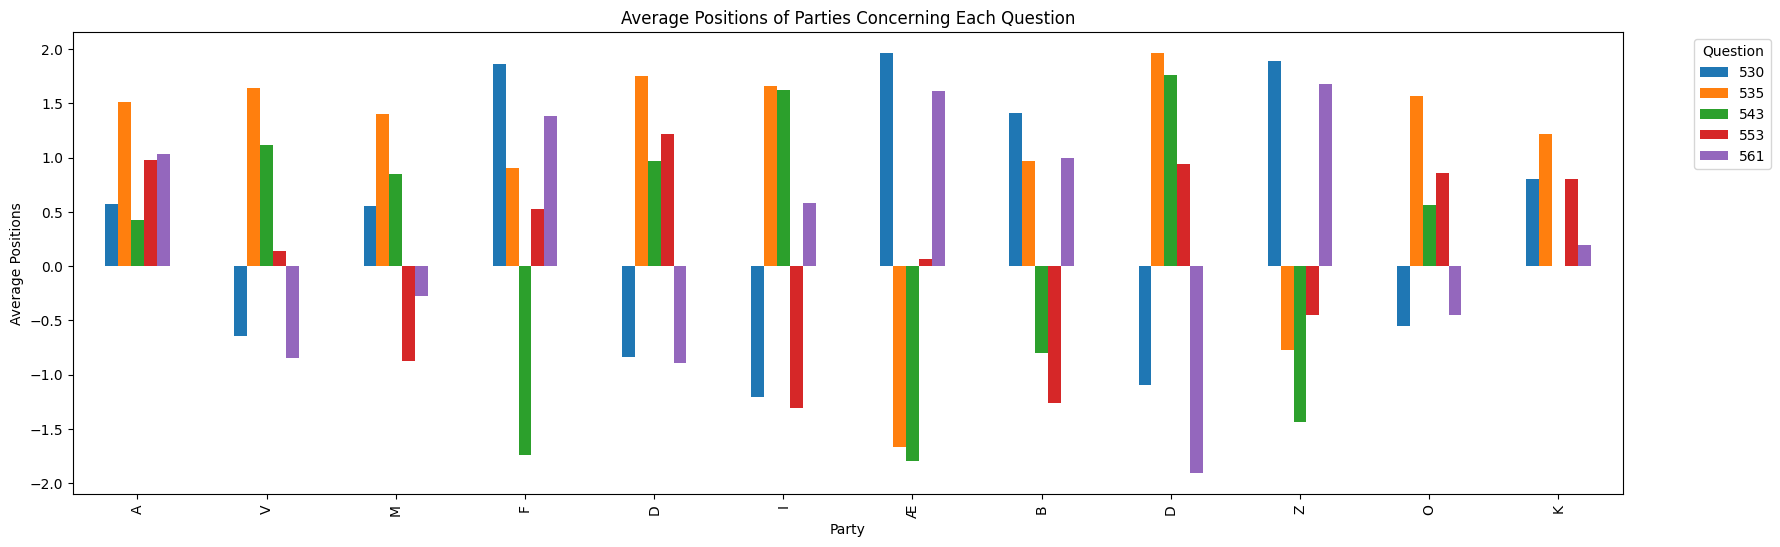

In [17]:
# dr
dr_q1 = dr_data_p[['530', '535', '543', '553', '561','parti']]
# Group by 'Party' and calculate the mean (average) for each question
party_attitude_means = dr_q1.groupby('parti').mean()

# Reset the index to make 'Party' a column instead of an index
party_attitude_means.reset_index(inplace=True)
# Replace party numbers with party letters
party_attitude_means['parti'] = party_attitude_means['parti'].map(party_number_mapping)
display(party_attitude_means)

# Set the 'parti' column as the index for the DataFrame
party_attitude_means.set_index('parti', inplace=True)

# Plot the data using Matplotlib
party_attitude_means.plot(kind='bar', figsize=(20, 6))
plt.xlabel('Party')
plt.ylabel('Average Positions')
plt.title('Average Positions of Parties Concerning Each Question')
plt.legend(title='Question', loc='upper right', bbox_to_anchor=(1.1, 1))

plt.show()

,parti,1a,1b,3a,3b,6a,6b,10a,10b
0,A,-0.397727,0.647727,0.715909,-0.238636,-0.909091,0.965909,-0.477273,1.897727
1,V,-1.304348,-0.195652,1.369565,-1.010870,-1.043478,0.619565,1.119565,0.076087
2,M,-0.541667,0.395833,1.291667,-0.229167,0.291667,-0.875000,1.125000,-1.062500
3,F,0.269231,1.307692,-0.192308,1.474359,1.346154,-1.692308,-0.717949,1.794872
4,D,-1.756757,-1.702703,1.324324,-1.864865,-1.810811,1.891892,0.918919,1.918919
5,I,-1.308642,-0.320988,1.901235,-1.419753,-0.259259,0.469136,1.691358,-1.901235
6,Æ,1.089744,1.807692,-1.743590,1.730769,1.897436,-1.987179,-1.012821,1.897436
7,B,0.971831,1.408451,0.830986,1.408451,1.661972,-1.901408,0.281690,-0.253521
8,D,-2.000000,-1.703704,1.981481,-1.944444,-1.944444,1.185185,1.851852,0.592593
9,Z,1.616279,1.802326,-0.651163,1.395349,1.593023,-1.872093,-0.162791,1.069767


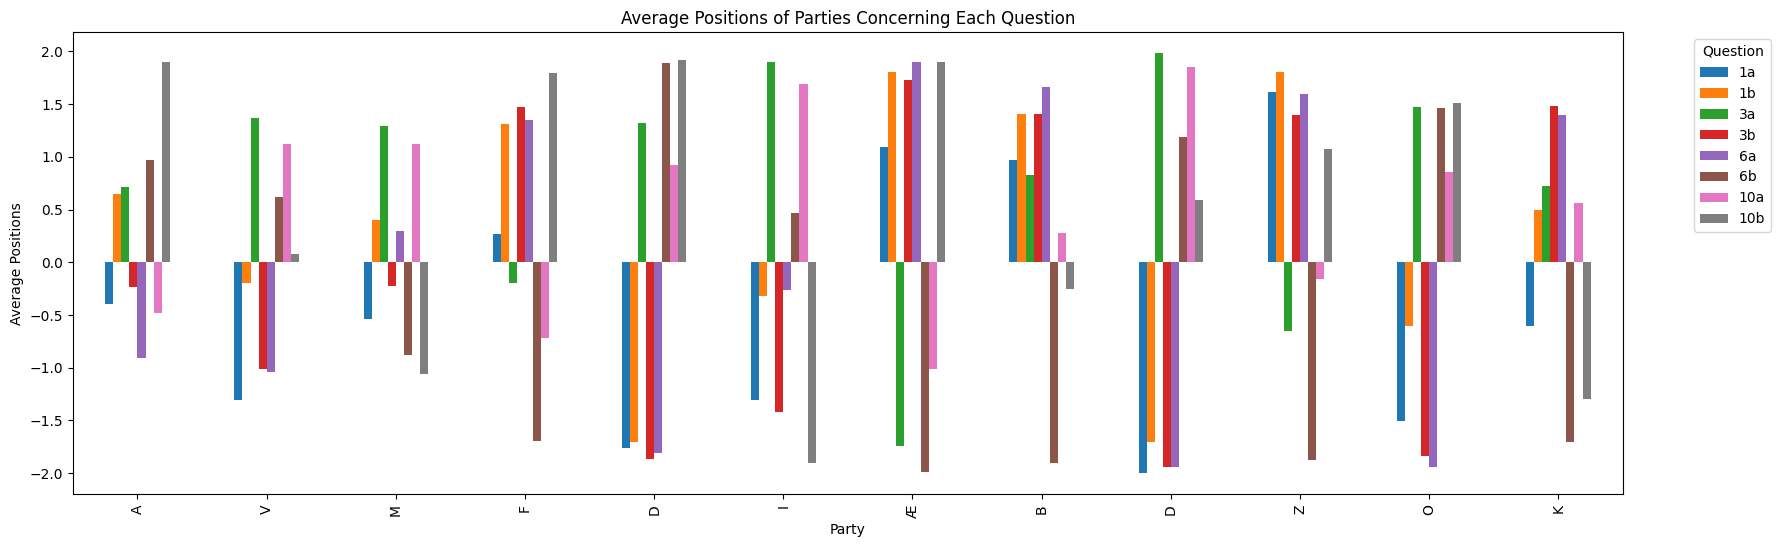

In [18]:
# tv2
tv2_q = tv2_data_p[['1a', '1b', '3a', '3b', '6a', '6b', '10a', '10b', 'parti']]
# Group by 'Party' and calculate the mean (average) for each question
party_attitude_means = tv2_q.groupby('parti').mean()

# Reset the index to make 'Party' a column instead of an index
party_attitude_means.reset_index(inplace=True)
# Replace party numbers with party letters
party_attitude_means['parti'] = party_attitude_means['parti'].map(party_number_mapping)
display(party_attitude_means)

# Set the 'parti' column as the index for the DataFrame
party_attitude_means.set_index('parti', inplace=True)

# Plot the data using Matplotlib
party_attitude_means.plot(kind='bar', figsize=(20, 6))
plt.xlabel('Party')
plt.ylabel('Average Positions')
plt.title('Average Positions of Parties Concerning Each Question')
plt.legend(title='Question', loc='upper right', bbox_to_anchor=(1.1, 1))

plt.show()

In [19]:
tv2_data.columns

Index(['1a', '1b', '2a', '2b', '3a', '3b', '4a', '4b', '5a', '5b', '6a', '6b',
       '7a', '7b', '8a', '8b', '9a', '9b', '10a', '10b', '11a', '11b', '12a',
       '12b', 'parti', 'navn', 'storkreds', 'alder'],
      dtype='object')

- Age of the candidates grouped by parties.

- (Here I calculate the average age from tv2, since there's no data from dr)

In [20]:
tv2_age = tv2_data[['parti', 'alder']]
# Group by 'Party' and calculate the mean (average) for each question
party_attitude_means = tv2_age.groupby('parti').mean()

# Reset the index to make 'Party' a column instead of an index
party_attitude_means.reset_index(inplace=True)
party_attitude_means

,parti,alder
0,Alternativet,47.290698
1,Danmarksdemokraterne,51.216216
2,Dansk Folkeparti,45.317460
3,Det Konservative Folkeparti,42.797980
4,Enhedslisten,40.833333
5,"Frie Grønne, Danmarks Nye Venstrefløjsparti",33.612903
6,Kristendemokraterne,50.840000
7,Liberal Alliance,37.444444
8,Løsgænger,50.500000
9,Moderaterne,44.812500


- An overview of the most "confident" candidates

In [21]:
# dr

# Define a function to count -2 and 2 in each row
def count_minus2_and_2(row):
    return (row == -2).sum() + (row == 2).sum()

# Apply the function to each row and create a new column 'Count'
dr_data['Count'] = dr_data.iloc[:, :-2].apply(count_minus2_and_2, axis=1)

# Sort the DataFrame based on the 'Count' column in descending order and select the top 10 rows
top_10_rows = dr_data.sort_values(by='Count', ascending=False).head(10)

# Select only the 'navn' and 'Count' columns for the top 10 rows
top_10_rows = top_10_rows[['navn']]

print(top_10_rows)

                    navn
525         Sarah Nørris
581  Kim Andkjær Doberck
91         Søren Vanting
844         Asham Nadeem
140          Clara Turms
244      Janne Toft-Lind
157           Rashid Ali
138            Rosa Lund
23       Lisbeth Torfing
154       Daniel Tomicic


In [22]:
# tv2
# Apply the function to each row and create a new column 'Count'
tv2_data['Count'] = dr_data.iloc[:, :-2].apply(count_minus2_and_2, axis=1)

# Sort the DataFrame based on the 'Count' column in descending order and select the top 10 rows
top_10_rows = tv2_data.sort_values(by='Count', ascending=False).head(10)

# Select only the 'navn' and 'Count' columns for the top 10 rows
top_10_rows = top_10_rows[['navn']]

print(top_10_rows)

                        navn
525           Pia Kjærsgaard
581               Mads Olsen
91   Carsten Damgaard Møller
844       Rishi Balachandran
140          Helge Bo Jensen
244       Mette Bloch Hansen
157       Jørgen Mathow-Juhl
138    Sofie Carsten Nielsen
23      Bjarne H. Kirkegaard
154       Tina Cartey Hansen


- Differences in responses between candidates, along with an explanation of which parties have the most internal disagreements.

In [23]:
# dr
# Define a function to count 2 and -2 in each question column
def count_2_and_minus2(column):
    return (column == 2).sum() + (column == -2).sum()

# Apply the function to each question column and create new columns
for col in dr_data.columns[:-1]:  # Exclude the 'parti' column
    dr_data[f'Count_2_and_minus2_{col}'] = dr_data[col].apply(lambda x: 1 if x == 2 or x == -2 else 0)

# Group the DataFrame by 'parti' and sum the counts within each party
party_counts_by_question = dr_data.groupby('parti').sum()

print(party_counts_by_question)

                                             530  531  533  534  535  537  \
parti                                                                       
Alternativet                                 134   83 -133 -130  -55 -116   
Danmarksdemokraterne                         -31  -51   56  -36   65    7   
Dansk Folkeparti                             -28  -56   80   85   80    3   
Det Konservative Folkeparti                  -84 -186   94 -169  179  139   
Enhedslisten                                 151  144 -147   35 -128 -145   
Frie Grønne, Danmarks Nye Venstrefløjsparti   50   50  -52  -44  -46  -52   
Kristendemokraterne                           37  -31  -56  -68   56  -19   
Liberal Alliance                             -95 -156  -71  -99  131  151   
Løsgænger                                      0   -2   -1    3    2    2   
Moderaterne                                   26   44  -17  -90   66   28   
Nye Borgerlige                               -59 -105  -39   94  106   93   

- Enhedslisten, Liberal Alliance, Det Konservative Folkeparti seems to be the parties have the most disagreements

In [24]:
# tv2
# Define a function to count 2 and -2 in each question column
def count_2_and_minus2(column):
    return (column == 2).sum() + (column == -2).sum()

# Apply the function to each question column and create new columns
for col in tv2_data.columns[:-1]:  # Exclude the 'parti' column
    tv2_data[f'Count_2_and_minus2_{col}'] = tv2_data[col].apply(lambda x: 1 if x == 2 or x == -2 else 0)

# Group the DataFrame by 'parti' and sum the counts within each party
party_counts_by_question_2 = tv2_data.groupby('parti').sum()

print(party_counts_by_question_2)

                                              1a   1b   2a   2b   3a   3b  \
parti                                                                       
Alternativet                                 139  155  129  117  -56  120   
Danmarksdemokraterne                         -65  -63   -5  -41   49  -69   
Dansk Folkeparti                             -95  -38   69  -46   93 -116   
Det Konservative Folkeparti                 -140  -40   54    7  163 -121   
Enhedslisten                                  85  141  140   41 -136  135   
Frie Grønne, Danmarks Nye Venstrefløjsparti   56   59   60   39  -54   53   
Kristendemokraterne                          -30   25   55   50   36   74   
Liberal Alliance                            -106  -26  -83 -129  154 -115   
Løsgænger                                     -8   -6    4    4   -3   -8   
Moderaterne                                  -26   19   67   75   62  -11   
Nye Borgerlige                              -108  -92  -21  -85  107 -105   

- Alternativet, Enhedslisten, Liberal Alliance seems to be the parties have the most disagreements

---------------

- Classification models to predict candidates' party affiliations. Investigate if there are any candidates who seem to be in the "wrong" party based on their political landscape positions. You must use the following three algorithms: **Decision Tree, Random Forrest, and Gradient Boosted Tree**.

In [25]:
party_mapping = pd.DataFrame({
    'Party letter': ['A', 'V', 'M', 'F', 'D', 'I', 'C', 'Æ', 'B', 'D', 'Z', 'O', 'G', 'K'],
    'Party name': ['Socialdemokratiet', 'Venstre', 'Moderaterne', 'Socialistisk Folkeparti', 'Danmarksdemokraterne', 'Liberal Alliance', 'Konservative', 'Enhedslisten', 'Radikale Venstre', 'Nye Borgerlige', 'Alternativet', 'Dansk Folkeparti', 'Frie Grønne', 'Kristendemokraterne']
})
# Define a mapping from party letters to numerical values
party_number_mapping = {
    "A": 1,
    "V": 2,
    "M": 3,
    "F": 4,
    "Æ": 5,
    "I": 6,
    "C": 7,
    "Ø": 8,
    "B": 9,
    "D": 10,
    "Å": 11,
    "O": 12,
    "Q": 13,
    "K": 14,
}

# Map party letters to numerical values
elect_data['parti'] = elect_data['parti'].map(party_mapping.set_index('Party name')['Party letter'])
elect_data['parti'] = elect_data['parti'].map(party_number_mapping)

# Drop rows with NaN values in the 'party' column
elect_data.dropna(subset=['parti'], inplace=True)

In [26]:
features = elect_data[
    [
        "530",
        "531",
        "533",
        "534",
        "535",
        "537",
        "538",
        "540",
        "541",
        "543",
        "544",
        "545",
        "546",
        "547",
        "548",
        "550",
        "551",
        "552",
        "553",
        "555",
        "556",
        "557",
        "559",
        "561",
        "563",
        "1a",
        "1b",
        "2a",
        "2b",
        "3a",
        "3b",
        "4a",
        "4b",
        "5a",
        "5b",
        "6a",
        "6b",
        "7a",
        "7b",
        "8a",
        "8b",
        "9a",
        "9b",
        "10a",
        "10b",
        "11a",
        "11b",
        "12a",
        "12b",
    ]
]
target = elect_data["parti"]

In [27]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=42
)

# Train a Decision Tree Classifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

# Train a Random Forest Classifier
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

# Train a Gradient Boosted Tree Classifier
gradient_boosting = GradientBoostingClassifier()
gradient_boosting.fit(X_train, y_train)


# Evaluate the Decision Tree model
y_pred_dt = decision_tree.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt}")

# Evaluate the Random Forest model
y_pred_rf = random_forest.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")

# Evaluate the Gradient Boosted Tree model
y_pred_gb = gradient_boosting.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosted Tree Accuracy: {accuracy_gb}")

Decision Tree Accuracy: 0.7419354838709677
Random Forest Accuracy: 0.9032258064516129
Gradient Boosted Tree Accuracy: 0.7741935483870968


- A clustering analysis where you attempt various cluster numbers, which would correspond to different parties. Discuss whether there is room for more clusters/parties or if a reduction is needed. Make sure you cover: **K-Means, Hierarchical clustering, and DBSCAN.**

In [28]:
X = elect_data[
    [
        "530",
        "531",
        "533",
        "534",
        "535",
        "537",
        "538",
        "540",
        "541",
        "543",
        "544",
        "545",
        "546",
        "547",
        "548",
        "550",
        "551",
        "552",
        "553",
        "555",
        "556",
        "557",
        "559",
        "561",
        "563",
        "1a",
        "1b",
        "2a",
        "2b",
        "3a",
        "3b",
        "4a",
        "4b",
        "5a",
        "5b",
        "6a",
        "6b",
        "7a",
        "7b",
        "8a",
        "8b",
        "9a",
        "9b",
        "10a",
        "10b",
        "11a",
        "11b",
        "12a",
        "12b",
        "parti"
    ]
]

In [29]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Fit K-Means with different values of K
for k in range(2, 25):
    kmeans = KMeans(n_clusters=k, random_state=45, n_init=10)
    clusters = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, clusters)
    print(f"K={k}, Silhouette Score: {silhouette_avg}")


K=2, Silhouette Score: 0.301409380152849
K=3, Silhouette Score: 0.3020559653275722
K=4, Silhouette Score: 0.3101103892630878
K=5, Silhouette Score: 0.3218343675923415
K=6, Silhouette Score: 0.3161488173600508
K=7, Silhouette Score: 0.32529855583832096
K=8, Silhouette Score: 0.32129891725979215
K=9, Silhouette Score: 0.25794827753709265
K=10, Silhouette Score: 0.2562706108066287
K=11, Silhouette Score: 0.25282685105358504
K=12, Silhouette Score: 0.22331046361860937
K=13, Silhouette Score: 0.20711201018983785
K=14, Silhouette Score: 0.1912127404498089
K=15, Silhouette Score: 0.19632036607520392
K=16, Silhouette Score: 0.21885549797438805
K=17, Silhouette Score: 0.20542589045152984
K=18, Silhouette Score: 0.18645908589763063
K=19, Silhouette Score: 0.14993512327639613
K=20, Silhouette Score: 0.19755294546370486
K=21, Silhouette Score: 0.16576318315313607
K=22, Silhouette Score: 0.1764977101128025
K=23, Silhouette Score: 0.1595619011374083
K=24, Silhouette Score: 0.1639440048971336


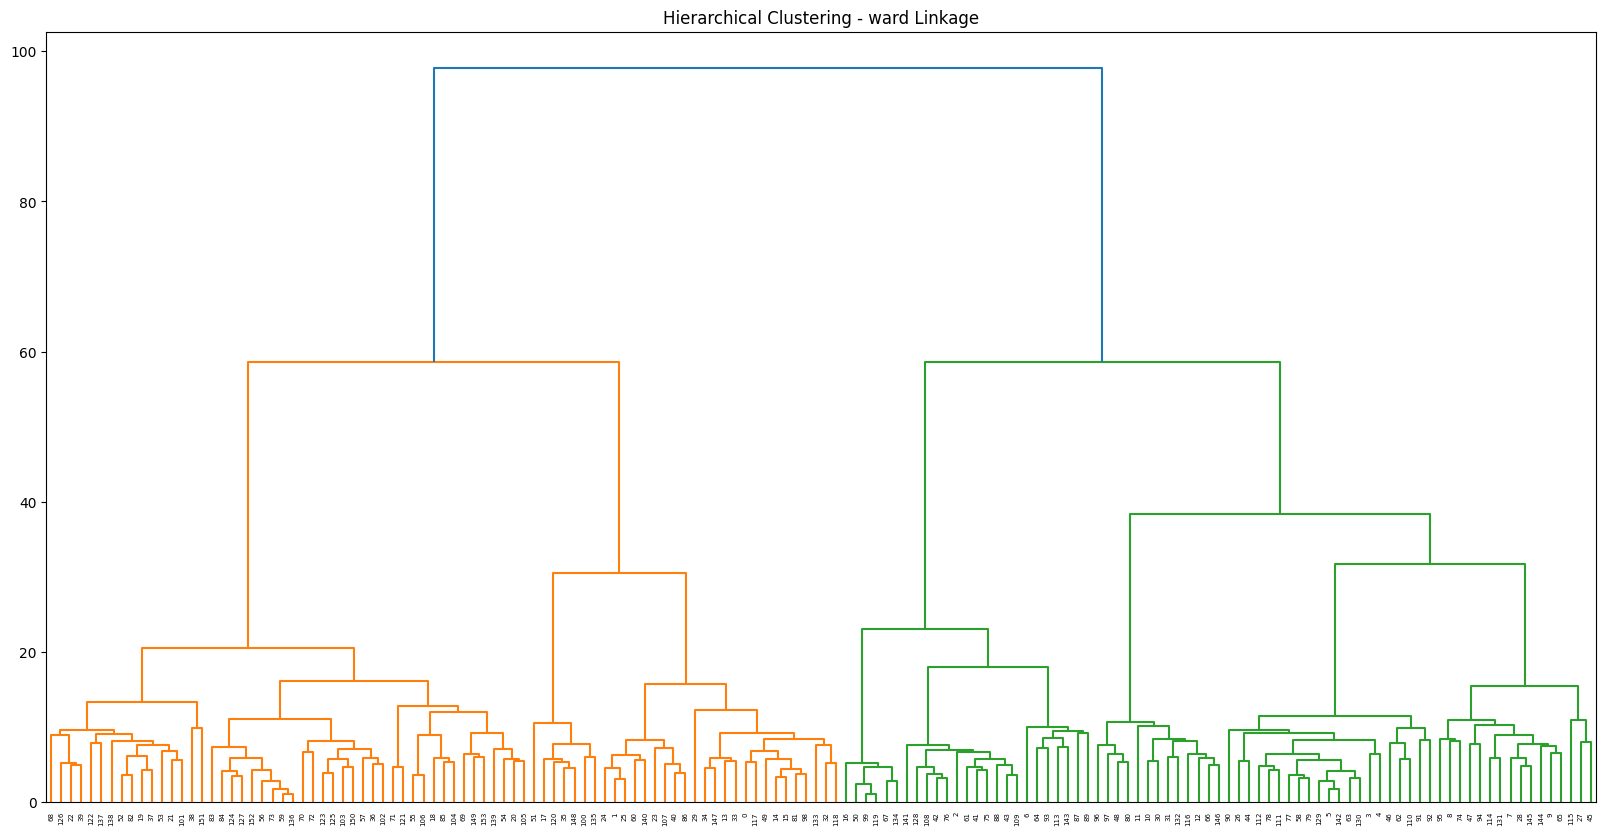

Number of Clusters (Hierarchical, ward Linkage): 8


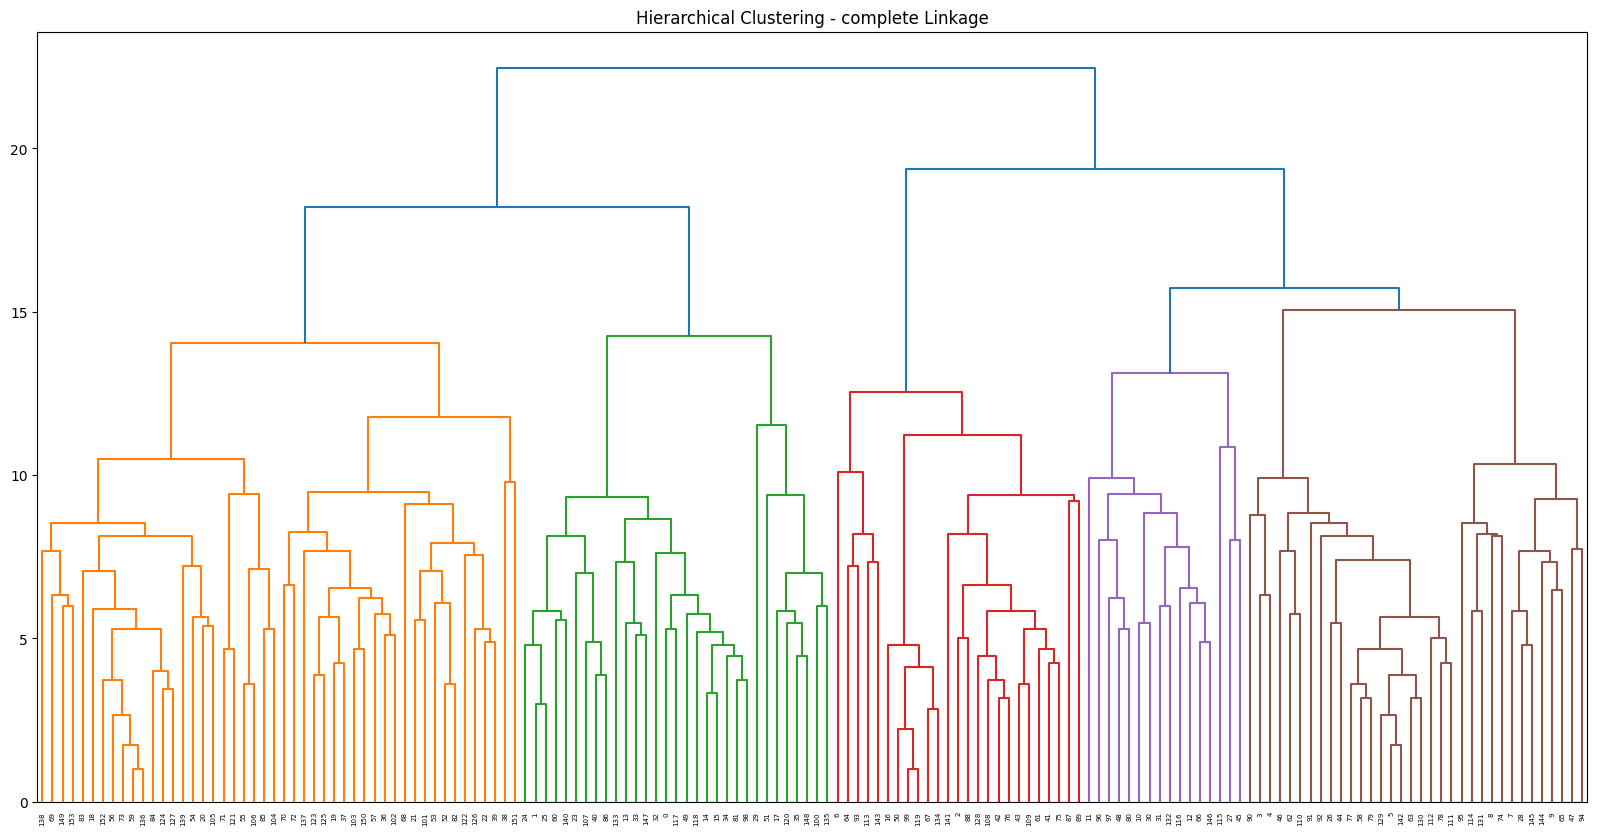

Number of Clusters (Hierarchical, complete Linkage): 8


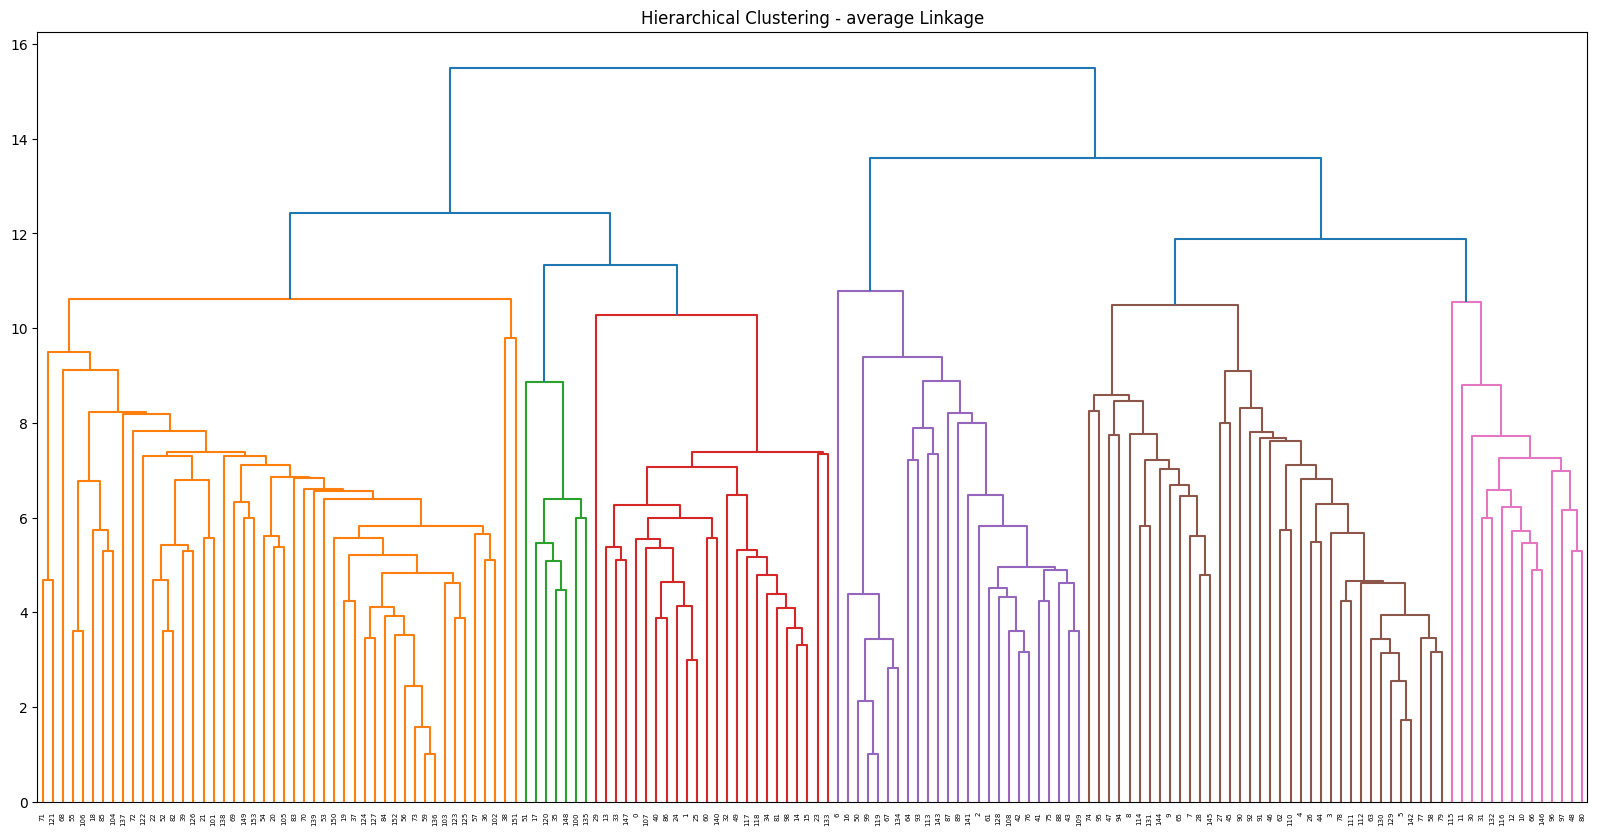

Number of Clusters (Hierarchical, average Linkage): 8


In [30]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

linkage_methods = ['ward', 'complete', 'average']

for method in linkage_methods:
    plt.figure(figsize=(20, 10))
    Z = linkage(X, method)
    dendrogram(Z)
    plt.title(f'Hierarchical Clustering - {method} Linkage')
    plt.show()

    # Cut the dendrogram to get clusters
    k = 8  # Adjust the number of clusters as needed
    clusters = fcluster(Z, t=k, criterion='maxclust')
    print(f"Number of Clusters (Hierarchical, {method} Linkage): {len(set(clusters))}")


In [31]:
from sklearn.cluster import DBSCAN

# Fit DBSCAN with different epsilon values
dbscan = DBSCAN(eps=1, min_samples=2).fit(X)
clusters = dbscan.fit_predict(X)
silhouette_avg = silhouette_score(X, clusters)
print(f"EPS={1}, Silhouette Score: {silhouette_avg}")


EPS=1, Silhouette Score: -0.2160305208529333



eps=0.1
Number of clusters: 1
Cluster sizes: [154]

eps=0.2
Number of clusters: 1
Cluster sizes: [154]

eps=0.5
Number of clusters: 1
Cluster sizes: [154]

eps=1
Number of clusters: 3
Cluster sizes: [150   2   2]

eps=10
Number of clusters: 1
Cluster sizes: [  0 154]


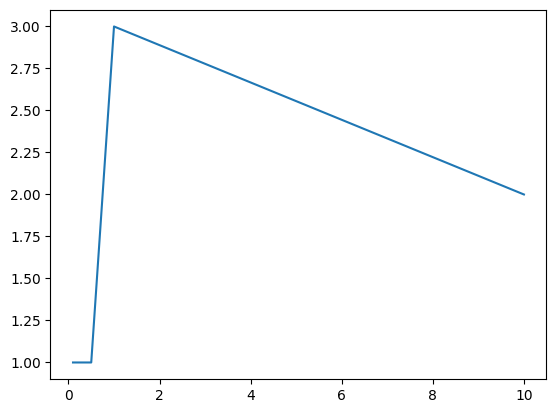

In [32]:
results = []
indexs = [0.1, 0.2, 0.5, 1, 10]
i = 0
for eps in indexs:
    print("\neps={}".format(eps))
    dbscan = DBSCAN(eps=eps, min_samples=2)
    labels = dbscan.fit_predict(X)
    print("Number of clusters: {}".format(len(np.unique(labels))))
    print("Cluster sizes: {}".format(np.bincount(labels + 1)))
    results.append(len(np.bincount(labels + 1)))
    i += 1
plt.plot(indexs, results)
plt.show()

- An overview of the political landscape of the elected candidates, highlighting which members agree or disagree the most and which parties or party members have significant disagreements.

In [33]:
# Create a dictionary with the party data
party_data = {
    'Party name': [
        'Socialdemokratiet',
        'Venstre',
        'Moderaterne',
        'Socialistisk Folkeparti',
        'Danmarksdemokraterne',
        'Liberal Alliance',
        'Konservative',
        'Enhedslisten',
        'Radikale Venstre',
        'Nye Borgerlige',
        'Alternativet',
        'Dansk Folkeparti',
        'Frie Grønne',
        'Kristendemokraterne'
    ],
    'Political position': [
        'Centre-left',
        'Centre-right',
        'Centre-right',
        'Left-wing',
        'Right-wing',
        'Right-wing',
        'Right-wing',
        'Far-left',
        'Centre-left',
        'Far-right',
        'Centre-left',
        'Far-right',
        'Centre-left',
        'Centre-right'
    ],
    'Parti float':[
        '1.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0', '10.0', '11.0', '12.0', '13.0', '14.0'
    ]
}

# Create a DataFrame
party_df = pd.DataFrame(party_data)

In [34]:
elect_data['parti'] = elect_data['parti'].astype('object')
elect_data['parti']

0       4.0
2       5.0
3      10.0
4       2.0
5       2.0
       ... 
164     1.0
165     1.0
166     1.0
167     1.0
168     1.0
Name: parti, Length: 154, dtype: object

In [35]:
# count (group by person)
elect_data_copy = elect_data.copy()

elect_data_copy

# Define a function to count occurrences of 2 and -2 for each row
def count_2_minus_2(row):
    return row[row.isin([2, -2])].count()

# Apply the function to each row
elect_data_copy['count_2_minus_2'] = elect_data_copy.apply(count_2_minus_2, axis=1)

# Select the desired columns
selected_columns = ['navn', 'parti', 'count_2_minus_2']

# Sort the DataFrame based on the new column in descending order
sorted_df = elect_data_copy[selected_columns].sort_values(by='count_2_minus_2', ascending=False)

# Display the sorted DataFrame with selected columns
print(sorted_df)

                         navn parti  count_2_minus_2
7             Nick Zimmermann  12.0               39
45            Peder Hvelplund   5.0               38
66         Victoria Velásquez   5.0               35
28                  Rosa Lund   5.0               35
118         Trine Pertou Mach   5.0               35
..                        ...   ...              ...
10   Tobias Grotkjær Elmstrøm   3.0                7
158       Rasmus Lund-Nielsen   3.0                6
113           Jesper Petersen   1.0                6
168               Jeppe Bruus   1.0                4
134               Kasper Roug   1.0                0

[154 rows x 3 columns]
